In [1]:
from algorithm.neat.gene.conn.bspline import BSplineConn
import jax, jax.numpy as jnp

In [19]:
conn_gene = BSplineConn(grid_cnt=10, spline_order=3, grid_init_range=[-1, 1])
state = conn_gene.setup()

In [20]:
randkey = jax.random.key(3)
k1, k2 = jax.random.split(randkey)
attrs1 = conn_gene.new_random_attrs(state, k1)
attrs2 = conn_gene.new_random_attrs(state, k2)
attrs1, attrs2

(Array([-2.        , -1.5555556 , -1.1111112 , -0.66666657, -0.22222227,
         0.22222233,  0.66666675,  1.1111112 ,  1.5555556 ,  2.        ,
        -1.3647934 , -0.06133604, -0.67493236, -0.23494798,  1.4040948 ,
        -1.4103687 ,  0.18820001, -0.6302892 , -1.9635582 ,  0.3691777 ,
         0.97018796,  1.2873127 ], dtype=float32),
 Array([-2.        , -1.5555556 , -1.1111112 , -0.66666657, -0.22222227,
         0.22222233,  0.66666675,  1.1111112 ,  1.5555556 ,  2.        ,
        -1.1737438 ,  0.8969659 ,  1.127439  ,  1.7055644 , -0.74586004,
         1.0907347 , -1.5847186 ,  1.3379306 , -1.0891589 ,  1.7622422 ,
         1.876175  , -1.033506  ], dtype=float32))

In [21]:
distance = conn_gene.distance(state, attrs1, attrs2)
distance

0.0, 0.9452241063117981


Array(0.47261205, dtype=float32)

In [22]:
out = conn_gene.forward(state, attrs1, 1)
out

Array(-1.3738157, dtype=float32)

In [23]:
batch_x = jax.random.normal(k1, (1000, )) * 0.3
batch_x.max(), batch_x.min()

(Array(1.0680349, dtype=float32), Array(-0.8857973, dtype=float32))

In [24]:
batch_output, new_attrs = conn_gene.update_by_batch(state, attrs1, batch_x)
new_attrs

resid: [0.00100023]


Array([-0.8857973 , -0.3740343 , -0.23061422, -0.13795438, -0.03827247,
        0.04180069,  0.12013934,  0.23201329,  0.36620033,  1.068035  ,
       -0.10794136,  0.60137945,  0.8359451 ,  0.03605032, -0.83068913,
       -0.6539811 , -0.14713624, -0.18018943, -0.6166692 , -1.1958175 ,
       -1.5304552 , -0.9817784 ], dtype=float32)

In [25]:
batch_forward = jax.jit(jax.vmap(conn_gene.forward, in_axes=(None, None, 0)))

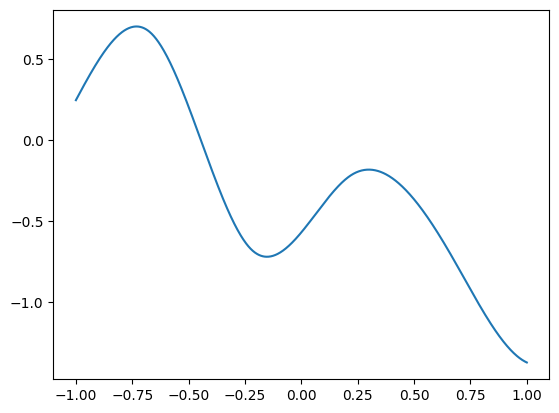

In [26]:
xs = jnp.linspace(-1, 1, 1000)
ys = batch_forward(state, attrs1, xs)
from matplotlib import pyplot as plt
plt.plot(xs, ys)

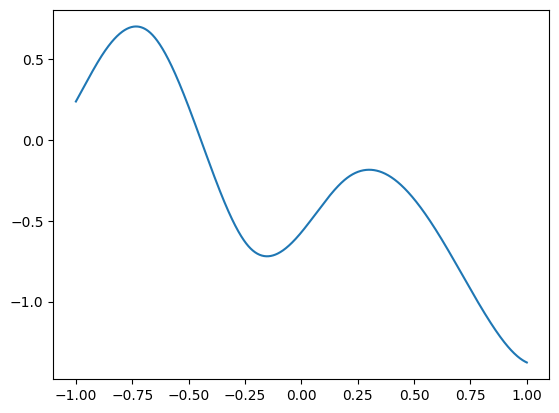

In [27]:
xs = jnp.linspace(-1, 1, 1000)
ys = batch_forward(state, new_attrs, xs)
from matplotlib import pyplot as plt
plt.plot(xs, ys)